# Visualizing fire scars through false color

Author: Michelle Yiv

[Link to GitHub Repository](https://github.com/mmyiv/eds220-hwk4)

## About this notebook

Dataset description:

Purpose:
    
Analysis highlight list:
    
References to datasets:

In [1]:
# Import libraries
import os
import pandas as pd
import geopandas as gpd
import numpy as np
import xarray as xr
import rioxarray as rioxr
import matplotlib.pyplot as plt

In [2]:
# Create filepath to import landsat data
fp = os.path.join('/',
                  'courses',
                  'EDS220',
                  'data',
                  'hwk4_landsat_data',
                  'landsat8-2018-01-26-sb-simplified.nc')
landsat = rioxr.open_rasterio(fp)

# View data
landsat

<xarray.Dataset> Size: 25MB
Dimensions:      (band: 1, x: 870, y: 731)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (band, y, x) float64 5MB ...
    green        (band, y, x) float64 5MB ...
    blue         (band, y, x) float64 5MB ...
    nir08        (band, y, x) float64 5MB ...
    swir22       (band, y, x) float64 5MB ...

In [3]:
# Import Thomas fire data
fp = os.path.join('data', 'thomas_fire.shp')
thomas_fire = gpd.read_file(fp)

### Data exploration

In [4]:
# Check dimensons
landsat.dims

FrozenMappingWarningOnValuesAccess({'band': 1, 'x': 870, 'y': 731})

In [5]:
# Check variable description
landsat.variables

Frozen({'band': <xarray.IndexVariable 'band' (band: 1)> Size: 8B
array([1]), 'x': <xarray.IndexVariable 'x' (x: 870)> Size: 7kB
array([121305., 121575., 121845., ..., 355395., 355665., 355935.])
Attributes:
    axis:           X
    crs:            EPSG:32611
    long_name:      x coordinate of projection
    resolution:     30
    standard_name:  projection_x_coordinate
    units:          metre
    _FillValue:     nan, 'y': <xarray.IndexVariable 'y' (y: 731)> Size: 6kB
array([3952395., 3952125., 3951855., ..., 3755835., 3755565., 3755295.])
Attributes:
    axis:           Y
    crs:            EPSG:32611
    long_name:      y coordinate of projection
    resolution:     -30
    standard_name:  projection_y_coordinate
    units:          metre
    _FillValue:     nan, 'spatial_ref': <xarray.Variable ()> Size: 8B
array(0)
Attributes: (12/18)
    crs_wkt:                           PROJCS["WGS 84 / UTM zone 11N",GEOGCS[...
    semi_major_axis:                   6378137.0
    semi_minor_a

In [6]:
# Check CRS
landsat.rio.crs

CRS.from_epsg(32611)

Exploration summary:
- Description of variables and dimensions

## True color image

In [14]:
# Drop `band` dimension by `squeeze()` and `drop_vars()`
landsat = landsat.squeeze().drop_vars('band')

ValueError: These variables cannot be found in this dataset: ['band']

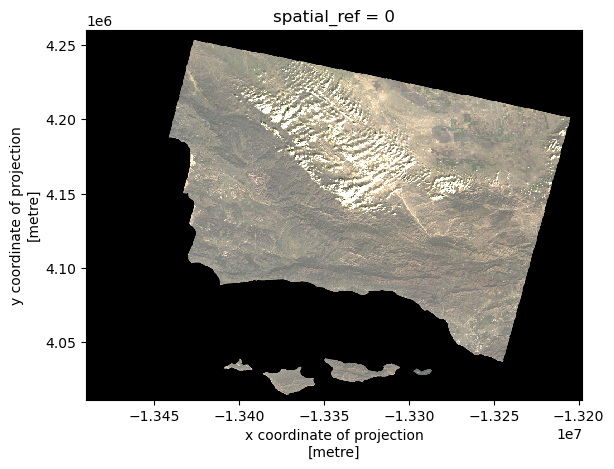

In [16]:
# Select red, green, and blue, set to array and plot
landsat[['red', 'green', 'blue']].to_array().plot.imshow(robust = True)

In [9]:
# Adjust band scale to get true color image via robust parameter

CRS: EPSG:3857


Explanation of outputs between part a and b

## False color image

In [10]:
# Make false color by plotting swir22, NIR, and red

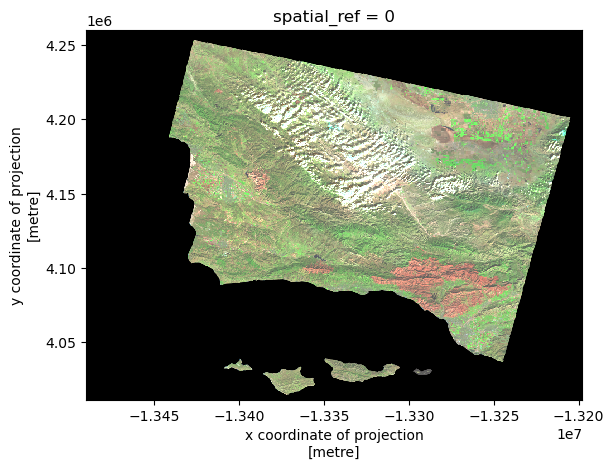

In [17]:
landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(robust = True)

## Map

In [11]:
# Check CRS of both data sets
print(f"{'Landsat CRS is':<10} {landsat.rio.crs}")
print(f"{'thomas_fire CRS is':<10} {thomas_fire.crs}")

Landsat CRS is EPSG:32611
thomas_fire CRS is EPSG:3857


In [12]:
# Convert CRS of landsat to thomas_fire
landsat = landsat.rio.reproject("EPSG:3857")

# Verify CRS match
assert landsat.rio.crs == thomas_fire.crs

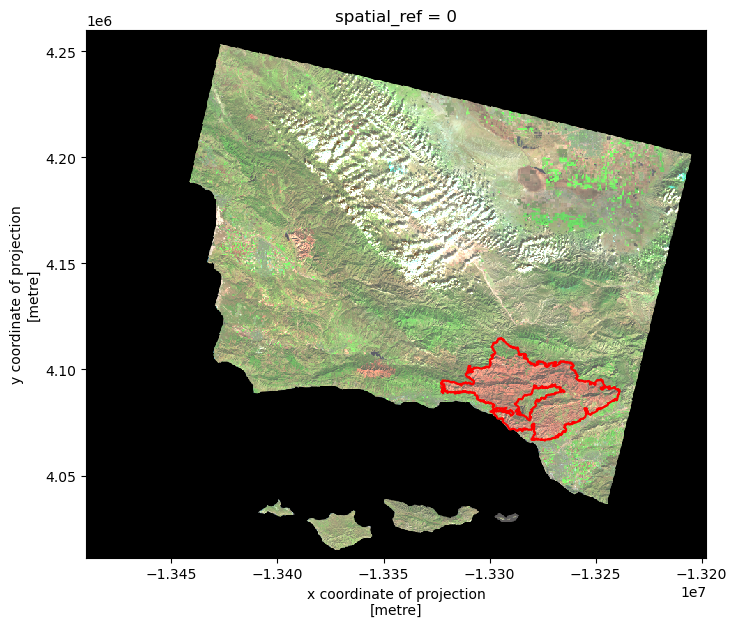

In [13]:
# Map of SWIR/NIR/RED with Thomas fire + figure description

# Initialize plot
fig, ax = plt.subplots(figsize = (8,8))

# Landsat plot
landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(ax = ax, robust = True)

# Thomas fire boundary
thomas_fire.boundary.plot(ax = ax,
                         edgecolor = 'red',
                         linewidth = 1.5,
                         label = 'Thomas Fire Boundary')

plt.show()